In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_rows", 5000)
pd.set_option("display.max_columns", 30)

In [14]:
base_df = pd.read_csv("../data/newborn-diseases.csv")
base_df.head()

,Race/Ethnicity,Case Count,Disorder Type,Screened Count,"Rate per 100,000"
0,American Indian,15,Other Rare Disorders,32300,46.44
1,American Indian,20,"Hypothyroidism, Primary Congenital (PCH)",32300,61.92
2,Asian Indian,26,Other Rare Disorders,68559,37.92
3,Asian Indian,70,"Hypothyroidism, Primary Congenital (PCH)",68559,102.10
4,Black,26,Other Rare Disorders,181203,14.35


In [15]:
race_list = ["White", "Black or African American", "American Indian and/or Alaska Native", "Asian",
         "Hispanic or Latino", "Mixed Race", 'Other', 'Not Reported']

races_dict = {'American Indian': "American Indian and/or Alaska Native",
        'Asian Indian': "Asian", 'Chinese/Japanese/Korean': "Asian", 
        'Filipino/Laotian/Vietnamese/Cambodian/Other SouthEast Asian': "Asian",
        'Middle Eastern': "Asian", 'Black': "Black or African American",
        'Hispanic': "Hispanic or Latino", 'Multiple': 'Mixed Race',
        'White': 'White', 'Other': 'Other', 'Unknown': 'Not Reported'}

In [16]:
race_df = base_df

for x in range(len(race_df)):
    race = race_df.iloc[x, 0]
    race_df.iloc[x, 0] = races_dict[race]

race_df.head()

,Race/Ethnicity,Case Count,Disorder Type,Screened Count,"Rate per 100,000"
0,American Indian and/or Alaska Native,15,Other Rare Disorders,32300,46.44
1,American Indian and/or Alaska Native,20,"Hypothyroidism, Primary Congenital (PCH)",32300,61.92
2,Asian,26,Other Rare Disorders,68559,37.92
3,Asian,70,"Hypothyroidism, Primary Congenital (PCH)",68559,102.10
4,Black or African American,26,Other Rare Disorders,181203,14.35


In [17]:
races = ["White", "Black or African American", "American Indian and/or Alaska Native", "Asian",
         "Hispanic or Latino", "Mixed Race", 'Other', 'Not Reported']

white_df = race_df.loc[race_df['Race/Ethnicity'] == races[0]]
black_df = race_df.loc[race_df['Race/Ethnicity'] == races[1]]
amind_df = race_df.loc[race_df['Race/Ethnicity'] == races[2]]
asian_df = race_df.loc[race_df['Race/Ethnicity'] == races[3]]
hispanic_df = race_df.loc[race_df['Race/Ethnicity'] == races[4]]
mixed_df = race_df.loc[race_df['Race/Ethnicity'] == races[5]]
other_df = race_df.loc[race_df['Race/Ethnicity'] == races[6]]
not_reported_df = race_df.loc[race_df['Race/Ethnicity'] == races[7]]

race_dataFrames = [white_df, black_df, amind_df, asian_df, hispanic_df, mixed_df, other_df, not_reported_df]

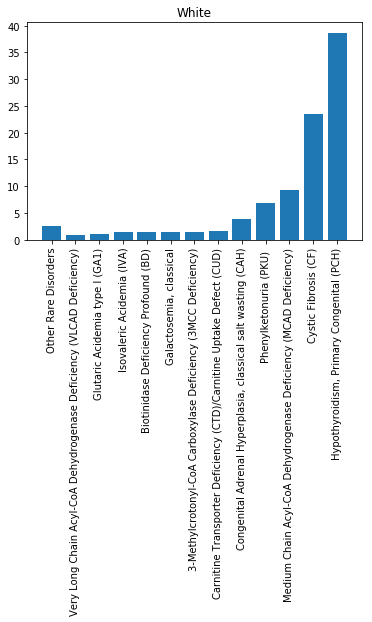

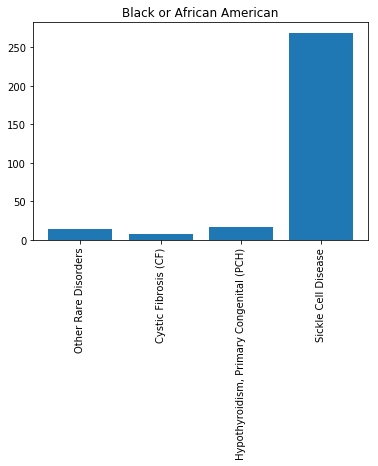

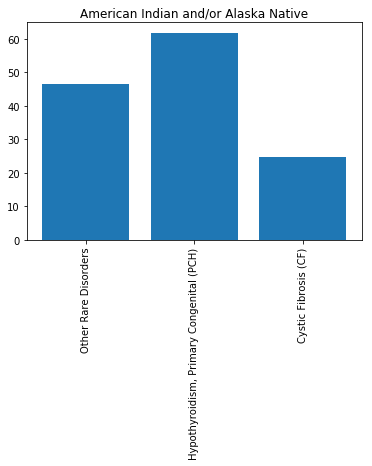

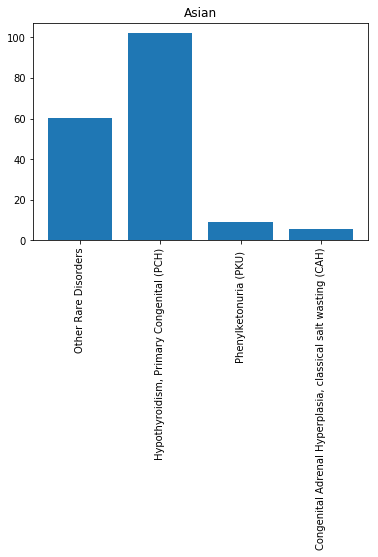

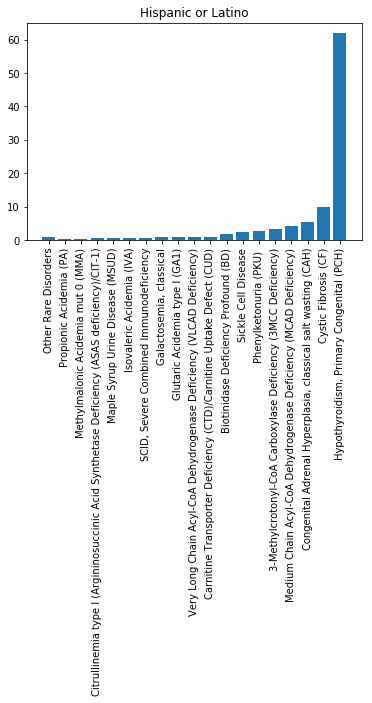

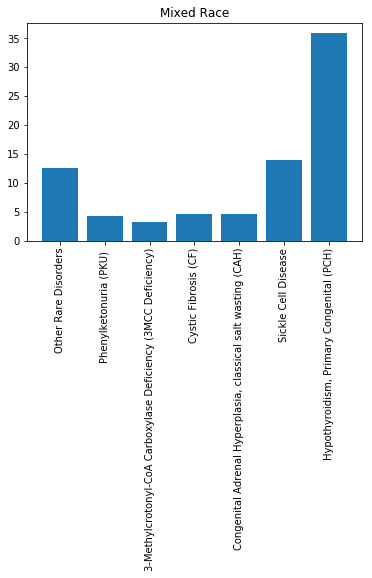

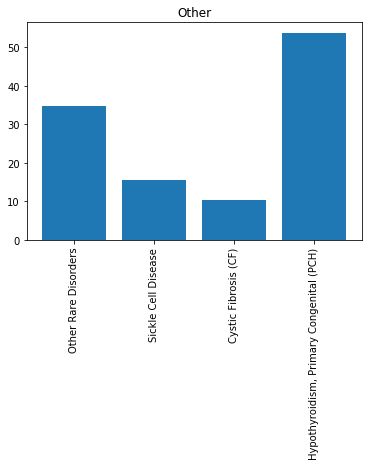

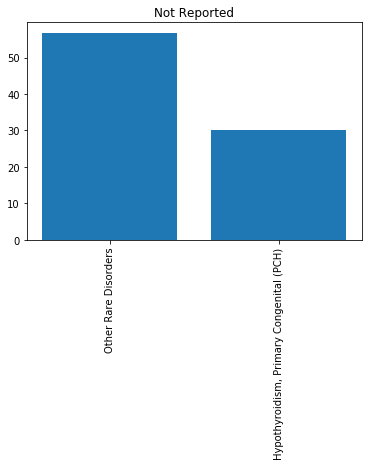

In [19]:
# plots = plt.subplot()
for df in race_dataFrames:
    plt.bar(df['Disorder Type'], df['Rate per 100,000'])
    plt.title(df['Race/Ethnicity'].iloc[0])
    plt.xticks(rotation=90)
    plt.show()

In [20]:
race_df.to_csv("../data/cleaned/diseasesByRace.csv", index=False)